In [32]:
import random as rand
import math

In [2]:
def read_cities(file_name):
    """
    Read in the cities from the given `file_name`, and return 
    them as a list of four-tuples: 
      [(state, city, latitude, longitude), ...] 
    Use this as your initial `road_map`, that is, the cycle 
      Alabama -> Alaska -> Arizona -> ... -> Wyoming -> Alabama.
    """
    
    #road_map = []
    infile = open(file_name,"r")
    inline = infile.readlines()
    r_listt = [line.rstrip() for line in inline]
    road_map = [(line.split('\t',4)) for line in r_listt]
    
    
    infile.close()   
    return road_map

road_map = read_cities('city-data.txt')
print(road_map)


[['Alabama', 'Montgomery', '32.361538', '-86.279118'], ['Alaska', 'Juneau', '58.301935', '-134.41974'], ['Arizona', 'Phoenix', '33.448457', '-112.073844'], ['Arkansas', 'Little Rock', '34.736009', '-92.331122'], ['California', 'Sacramento', '38.555605', '-121.468926'], ['Colorado', 'Denver', '39.7391667', '-104.984167'], ['Connecticut', 'Hartford', '41.767', '-72.677'], ['Delaware', 'Dover', '39.161921', '-75.526755'], ['Florida', 'Tallahassee', '30.4518', '-84.27277'], ['Georgia', 'Atlanta', '33.76', '-84.39'], ['Hawaii', 'Honolulu', '21.30895', '-157.826182'], ['Idaho', 'Boise', '43.613739', '-116.237651'], ['Illinois', 'Springfield', '39.78325', '-89.650373'], ['Indiana', 'Indianapolis', '39.790942', '-86.147685'], ['Iowa', 'Des Moines', '41.590939', '-93.620866'], ['Kansas', 'Topeka', '39.04', '-95.69'], ['Kentucky', 'Frankfort', '38.197274', '-84.86311'], ['Louisiana', 'Baton Rouge', '30.45809', '-91.140229'], ['Maine', 'Augusta', '44.323535', '-69.765261'], ['Maryland', 'Annapoli

In [49]:
def print_cities(road_map):
    """
    Prints a list of cities, along with their locations. 
    Print only one or two digits after the decimal point.
    """
    
    #creates a list (road_map2) where each index has a list of: str,str,float,float.
    road_map2 = [(i[0],i[1],round(float(i[2]),2),round(float(i[3]),2)) for i in road_map]
    road_map = road_map2


    return (road_map)

print(print_cities(road_map))


[('Alabama', 'Montgomery', 32.36, -86.28), ('Alaska', 'Juneau', 58.3, -134.42), ('Arizona', 'Phoenix', 33.45, -112.07), ('Arkansas', 'Little Rock', 34.74, -92.33), ('California', 'Sacramento', 38.56, -121.47), ('Colorado', 'Denver', 39.74, -104.98), ('Connecticut', 'Hartford', 41.77, -72.68), ('Delaware', 'Dover', 39.16, -75.53), ('Florida', 'Tallahassee', 30.45, -84.27), ('Georgia', 'Atlanta', 33.76, -84.39), ('Hawaii', 'Honolulu', 21.31, -157.83), ('Idaho', 'Boise', 43.61, -116.24), ('Illinois', 'Springfield', 39.78, -89.65), ('Indiana', 'Indianapolis', 39.79, -86.15), ('Iowa', 'Des Moines', 41.59, -93.62), ('Kansas', 'Topeka', 39.04, -95.69), ('Kentucky', 'Frankfort', 38.2, -84.86), ('Louisiana', 'Baton Rouge', 30.46, -91.14), ('Maine', 'Augusta', 44.32, -69.77), ('Maryland', 'Annapolis', 38.97, -76.5), ('Massachusetts', 'Boston', 42.24, -71.03), ('Michigan', 'Lansing', 42.73, -84.55), ('Minnesota', 'Saint Paul', 44.95, -93.09), ('Mississippi', 'Jackson', 32.32, -90.21), ('Missouri'

In [25]:
def compute_total_distance(road_map):
    """
    Returns, as a floating point number, the sum of the distances of all 
    the connections in the `road_map`. Remember that it's a cycle, so that 
    (for example) in the initial `road_map`, Wyoming connects to Alabama...
    """
    
    #to check for empty road_map
    if len(road_map) == 0: 
        return "Empty 'road_map', please input correct format: [('state','city','latitude','longitude')]."
    
    #to check if longitude and latitude is in float() type and if road_map follows correct format. 
    for i in road_map:
        if len(i)!= 4: 
            return "List does not follow format [(state, city, latitude, longitude)]"
        if type(i[2]) != float or type(i[3]) != float:
            return "Incorrect type/format. 'road_map' index[2] and [3] must be of float() types." 
        if type(i[0]) != str or type(i[1]) != str:
            return "Incorrect type/format. 'road_map' index[2] and [3] must be of str() types." 
        
    total_distance = 0
    #coordinates index from road_map. (floats, longitude and latitude)
    x1 = road_map[0][2] 
    y1 = road_map[0][3]
    
    x2 = 0
    y2 = 0

    for i in range(len(road_map)): 
        x2 = road_map[(i + 1) % len(road_map)][2]
        y2 = road_map[(i + 1) % len(road_map)][3]
        #compute distance between two cities and then add to 'total_distance', returns a float to 2 decimal places. 
        total_distance += math.sqrt((x1-x2)**2 + (y1-y2)**2)    
        x1 = x2
        y1 = y2
            
    return round(float(total_distance),2)

#print(compute_total_distance(road_map))

In [47]:
def swap_cities(road_map, index1, index2):

    #if indices are same, return road_map. 
    if index1==index2:
        return road_map
    
    #checks if inputted index1 and index2 is of int type.     
    if type(index1)!= int or type(index2) != int:
        return "Input: index1 or index2 is of wrong type. Input must be an int."
    
    #to check for empty road_map
    if len(road_map) == 0: 
        return "Empty 'road_map', please input correct format: [('state','city','latitude','longitude')]."
    
    #to check if longitude and latitude is in float() type and if road_map follows correct format. 
    for i in road_map:
        if type(i[2]) != float or type(i[3]) != float:
            return "Incorrect type. 'road_map' index[2] and [3] must be of float() types."
        if type(i[0]) != str or type(i[1]) != str:
            return "Incorrect type. 'road_map' index[0] and [1] must be of str() types."
        if len(i)!= 4: 
            return "List does not follow format [(state, city, latitude, longitude)]"
            
    #create new_road_map from original road_map so that original is unaltered.
    new_road_map = [(i) for i in road_map]
    new_road_map [index1],new_road_map [index2] = new_road_map [index2],new_road_map [index1]
    
    new_total_distance = compute_total_distance(new_road_map)

    return (new_road_map, new_total_distance)
#print(swap_cities(road_map,0,1))


In [27]:
def shift_cities(road_map):
    """
    For every index i in the `road_map`, the city at the position i moves
    to the position i+1. The city at the last position moves to the position
    0. Return the new road map. 
    """
    
    #road_map = [road_map[-1]] + road_map[:-1]
    #print(road_map)
    
    #to check for empty road_map
    if len(road_map) == 0: 
        return "Empty 'road_map', please input correct format: [('state','city','latitude','longitude')]."
    
    #to check if longitude and latitude is in float() type and if road_map follows correct format. 
    for i in road_map:
        if type(i[2]) != float or type(i[3]) != float:
            return "Incorrect type. 'road_map' index[2] and [3] must be of float() types."
        if type(i[0]) != str or type(i[1]) != str:
            return "Incorrect type. 'road_map' index[0] and [1] must be of str() types."
        if len(i)!= 4: 
            return "List does not follow format [(state, city, latitude, longitude)]"
     
    #create new_road_map to leave original unaltered.
    new_road_map = [(i) for i in road_map]
    
    #shifts all elements in list to index+1. Last element becomes index[0] (start of list).
    new_road_map.insert(0,new_road_map.pop())
    
    return  new_road_map
#print(shift_cities(road_map))

In [28]:
def find_best_cycle(road_map):
    """ 
    Using a combination of swap_cities and shift_cities, try 10000 swaps/shifts, 
    and each time keep the best cycle found so far. After 10000 swaps/shifts, return the best cycle found so far. 
    Use randomly generated indices for swapping. 
    """
    
    n = 10000
    count = 0
    new_cycle = 0
    best_cycle = 1060.14
    best_cycle_road_map = road_map 
    
    while count!= n:
        #generate random int to choose element from road_map. int range from 0 to len(road_map).
        n1 = int((len(road_map)) * rand.random())
        n2 = int((len(road_map)) * rand.random())

        a = swap_cities(best_cycle_road_map, n1, n2)

        #a[1] is total_distance computed for road_map. 
        if a[1] < best_cycle: 
            best_cycle = a[1]
            best_cycle_road_map = a[0] #a[0] is road_map generated for the cycle. 

        b = shift_cities(best_cycle_road_map)
        
        new_cycle = compute_total_distance(b)
        
        if new_cycle < best_cycle:
            best_cycle = new_cycle
            
            best_cycle_road_map = b

        count+=1

    return ('Total distance: ' + str(best_cycle)), best_cycle_road_map
#store best cycle and best shift/swap, compares and replaces. 

In [29]:
def print_map(road_map):
    """
    Prints, in an easily understandable format, the cities and 
    their connections, along with the cost for each connection 
    and the total cost.
    
    ***need to fix this for new functions!!!!***
    """

    for i in range(len(road_map)): 
        x1 = road_map[i][2]
        y1 = road_map[i][3]
        x2 = 0
        y2 = 0
        
        #print(x1, x2, y1,y2)
        x2 = road_map[(i + 1) % len(road_map)][2]
        y2 = road_map[(i + 1) % len(road_map)][3]
        #print(x2,y2)
        distance = round((math.sqrt((x1-x2)**2 + (y1-y2)**2)),2) 
        print('Distance between '+ str(road_map[i][1]) + ' -> ' + str(road_map[(i + 1) % len(road_map)][1]) +' is '+ str(distance))
        
    total_distance = compute_total_distance(road_map)    
    print ('Total distance: ' + str(total_distance))
        
#print_map(road_map)

In [45]:
def main():
    """
    Reads in, and prints out, the city data, then creates the "best"
    cycle and prints it out.
    """

    file = input("Please input your file name: \n")
    
    #prevents function from crashing if file is not found. Prompts user to input file name again. 
    try:
        f = open(file, "r")
    except:
        print("There is no file named " + "'" + file + "'.")
        file = input("Please input your file name: \n")
    
    road_map = read_cities(file)
    
    #print_roadmap = print_cities(road_map)
    
    #assigned original road_map
    road_map2 = print_cities(road_map)
    print('\n'+str(road_map2) +  '\n')
    
    best_cycle = find_best_cycle(road_map2)
    
    print(best_cycle)

    if __name__ == "__main__": #keep this in
        main()
        return "main name"

In [48]:
#main()

In [9]:
#longitude = x, latitude = y
def visualise(road_map):
    import tkinter as tk
    import matplotlib 
    import matplotlib.pyplot as plt
    from matplotlib.path import Path
    import matplotlib.patches as patches
    from matplotlib.pyplot import figure
    
    longitude_x = [(i[3]) for i in road_map]
    latitude_y = [(i[2]) for i in road_map]
    
    plt.scatter(longitude_x, latitude_y)
    plt.plot(longitude_x, latitude_y, color = 'green', label = 'Total distance: ' + str(350))
    #plt.plot(x1,y1, color = 'red', label = 'abnormal')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.legend(loc="lower right", prop = {'size':10})
    #plt.ylim(-90, 90)
    #plt.xlim(-180,180)
    plt.ylim(20, 60)
    plt.xlim(-160,-60)
    
    #plt.plot(figsize=[40,40])#to change figure size
    plt.title("TSP: best cycle road map visualiser.")

    plt.show()
    
    
# print(visualise(best_cycle_road_map))

In [4]:
rm = [('Alabama', 'Montgomery', 32.36, -86.28), ('Alaska', 'Juneau', 58.3, -134.42), ('Arizona', 'Phoenix', 33.45, -112.07), ('Arkansas', 'Little Rock', 34.74, -92.33), ('California', 'Sacramento', 38.56, -121.47), ('Colorado', 'Denver', 39.74, -104.98), ('Connecticut', 'Hartford', 41.77, -72.68), ('Delaware', 'Dover', 39.16, -75.53), ('Florida', 'Tallahassee', 30.45, -84.27), ('Georgia', 'Atlanta', 33.76, -84.39), ('Hawaii', 'Honolulu', 21.31, -157.83), ('Idaho', 'Boise', 43.61, -116.24), ('Illinois', 'Springfield', 39.78, -89.65), ('Indiana', 'Indianapolis', 39.79, -86.15), ('Iowa', 'Des Moines', 41.59, -93.62), ('Kansas', 'Topeka', 39.04, -95.69), ('Kentucky', 'Frankfort', 38.2, -84.86), ('Louisiana', 'Baton Rouge', 30.46, -91.14), ('Maine', 'Augusta', 44.32, -69.77), ('Maryland', 'Annapolis', 38.97, -76.5), ('Massachusetts', 'Boston', 42.24, -71.03), ('Michigan', 'Lansing', 42.73, -84.55), ('Minnesota', 'Saint Paul', 44.95, -93.09), ('Mississippi', 'Jackson', 32.32, -90.21), ('Missouri', 'Jefferson City', 38.57, -92.19), ('Montana', 'Helana', 46.6, -112.03), ('Nebraska', 'Lincoln', 40.81, -96.68), ('Nevada', 'Carson City', 39.16, -119.75), ('New Hampshire', 'Concord', 43.22, -71.55), ('New Jersey', 'Trenton', 40.22, -74.76), ('New Mexico', 'Santa Fe', 35.67, -105.96), ('New York', 'Albany', 42.66, -73.78), ('North Carolina', 'Raleigh', 35.77, -78.64), ('North Dakota', 'Bismarck', 48.81, -100.78), ('Ohio', 'Columbus', 39.96, -83.0), ('Oklahoma', 'Oklahoma City', 35.48, -97.53), ('Oregon', 'Salem', 44.93, -123.03), ('Pennsylvania', 'Harrisburg', 40.27, -76.88), ('Rhode Island', 'Providence', 41.82, -71.42), ('South Carolina', 'Columbia', 34.0, -81.03), ('South Dakota', 'Pierre', 44.37, -100.34), ('Tennessee', 'Nashville', 36.16, -86.78), ('Texas', 'Austin', 30.27, -97.75), ('Utah', 'Salt Lake City', 40.75, -111.89), ('Vermont', 'Montpelier', 44.27, -72.57), ('Virginia', 'Richmond', 37.54, -77.46), ('Washington', 'Olympia', 47.04, -122.89), ('West Virginia', 'Charleston', 38.35, -81.63), ('Wisconsin', 'Madison', 43.07, -89.38), ('Wyoming', 'Cheyenne', 41.15, -104.8)]

In [5]:
print(rm)

[('Alabama', 'Montgomery', 32.36, -86.28), ('Alaska', 'Juneau', 58.3, -134.42), ('Arizona', 'Phoenix', 33.45, -112.07), ('Arkansas', 'Little Rock', 34.74, -92.33), ('California', 'Sacramento', 38.56, -121.47), ('Colorado', 'Denver', 39.74, -104.98), ('Connecticut', 'Hartford', 41.77, -72.68), ('Delaware', 'Dover', 39.16, -75.53), ('Florida', 'Tallahassee', 30.45, -84.27), ('Georgia', 'Atlanta', 33.76, -84.39), ('Hawaii', 'Honolulu', 21.31, -157.83), ('Idaho', 'Boise', 43.61, -116.24), ('Illinois', 'Springfield', 39.78, -89.65), ('Indiana', 'Indianapolis', 39.79, -86.15), ('Iowa', 'Des Moines', 41.59, -93.62), ('Kansas', 'Topeka', 39.04, -95.69), ('Kentucky', 'Frankfort', 38.2, -84.86), ('Louisiana', 'Baton Rouge', 30.46, -91.14), ('Maine', 'Augusta', 44.32, -69.77), ('Maryland', 'Annapolis', 38.97, -76.5), ('Massachusetts', 'Boston', 42.24, -71.03), ('Michigan', 'Lansing', 42.73, -84.55), ('Minnesota', 'Saint Paul', 44.95, -93.09), ('Mississippi', 'Jackson', 32.32, -90.21), ('Missouri'

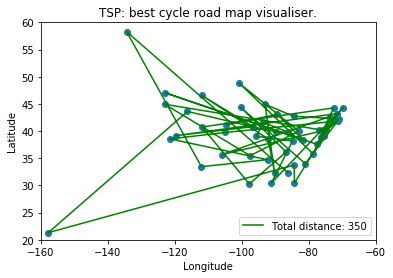

In [10]:
visualise(rm)